In [86]:
from mitgcmdata import MITgcmmodel
reload(MITgcmmodel)
from mitgcmdata import layers
import MITgcmutils.mds as mds
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.origin'] = 'bottom'
plt.rcParams['figure.figsize'] = (14,8)

In [172]:
import helper
reload(helper)

ddir = '/home/rpa/MITgcm/verification/global_oce_latlon_layers/run'

N = 2

layers_name = '1RHO'
deltaTclock = 86400
iter0 = 36000
#iter0 = 39600
diters = 3600

In [173]:
m = MITgcmmodel.ModelInstance(ddir, default_iter=39600)

 90  40  15


In [174]:
lt = m.rdmds('DiagLAYERS-transport')
ld = m.rdmds('DiagLAYERS-diapycnal')


<matplotlib.colorbar.Colorbar instance at 0x7fb371c83710>

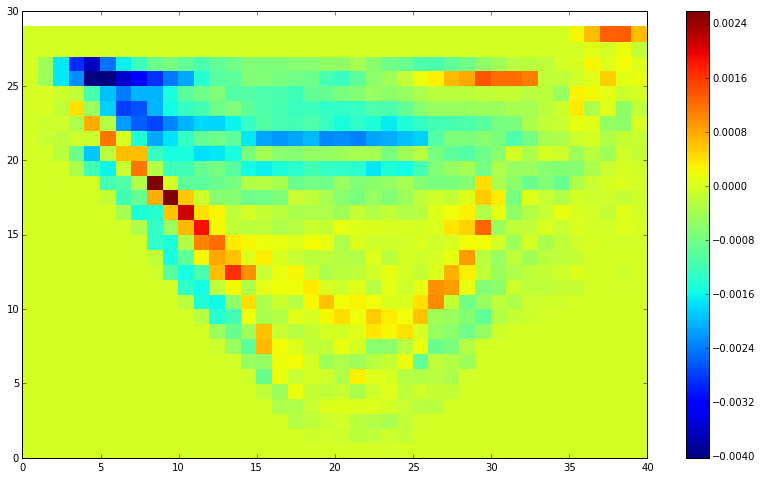

In [175]:
plt.pcolormesh((ld[-2] + ld[-1]).mean(axis=-1))
#plt.clim([-1e-5,1e-5])
plt.colorbar()
#plt.clim([0,1])

In [176]:
d = helper.process_layers(ddir, iter0, diters, N, deltaTclock, layers_name,
                          layers_trend_Hc_index=2)

 90  40  15
uh vh shape = (30, 40, 90) (30, 40, 90)
layers_trend.shape (2, 30, 40, 90)
(29, 40, 90) (29, 40, 90) (29, 40, 90)
(30, 40)


Yg.shape (41,)
d['psi'].shape (30, 40)


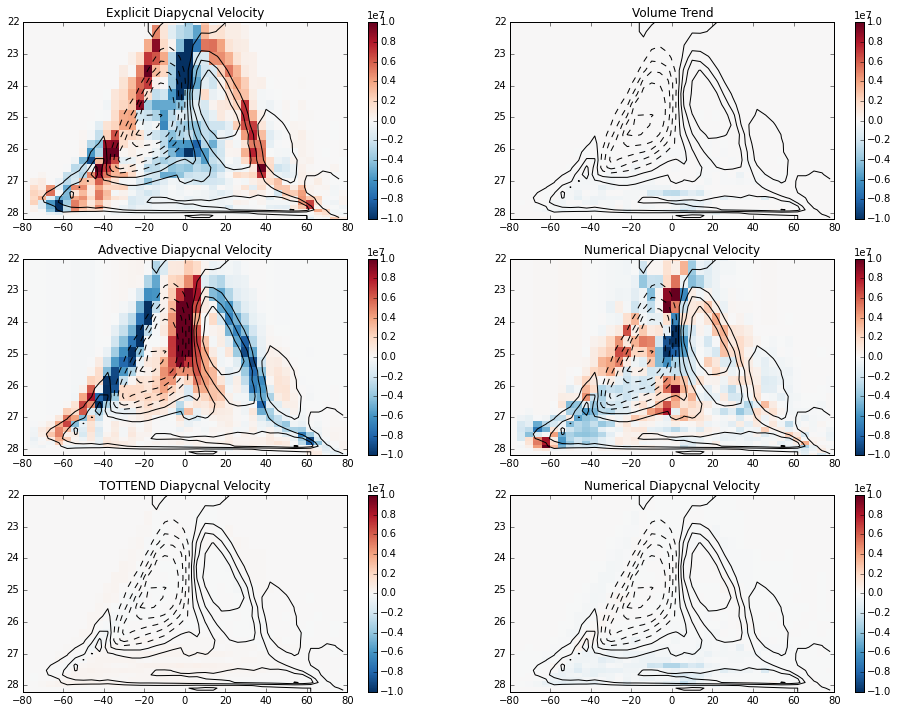

In [179]:
reload(helper)
helper.plot_diapycnal_velocities(d, r=1e7, direct=False)

<matplotlib.colorbar.Colorbar instance at 0x7fb3781a9bd8>

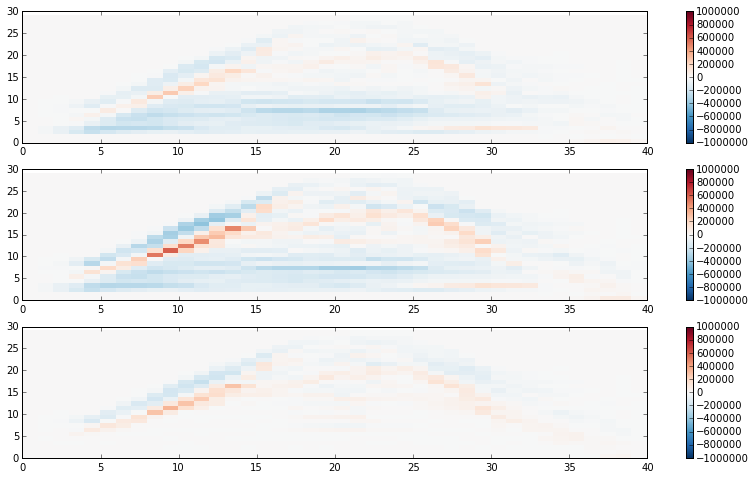

In [119]:
plt.subplot(311)
plt.pcolormesh(-d['diapycnal_vel_tottend'].sum(axis=-1), cmap='RdBu_r')
plt.clim([-1e6,1e6])
plt.colorbar()

plt.subplot(312)
plt.pcolormesh((d['advective_vel_direct'] + d['diapycnal_vel'].sum(axis=0)).sum(axis=-1), cmap='RdBu_r')
plt.clim([-1e6,1e6])
plt.colorbar()

plt.subplot(313)
plt.pcolormesh((d['advective_vel_direct'] + d['diapycnal_vel'].sum(axis=0) + d['diapycnal_vel_tottend']).sum(axis=-1), cmap='RdBu_r')
plt.clim([-1e6,1e6])
plt.colorbar()

In [117]:
iters = [iter0, iter0+diters]
latr, i, meta = mds.rdmds(ddir+'DiagLAYERS-trend',iters, returnmeta=True)
print meta['fldlist']
Hc = latr[:,2]


IOError: No files found for /home/rpa/MITgcm/verification/global_oce_latlon_layers/runDiagLAYERS-trend.0000036000.meta

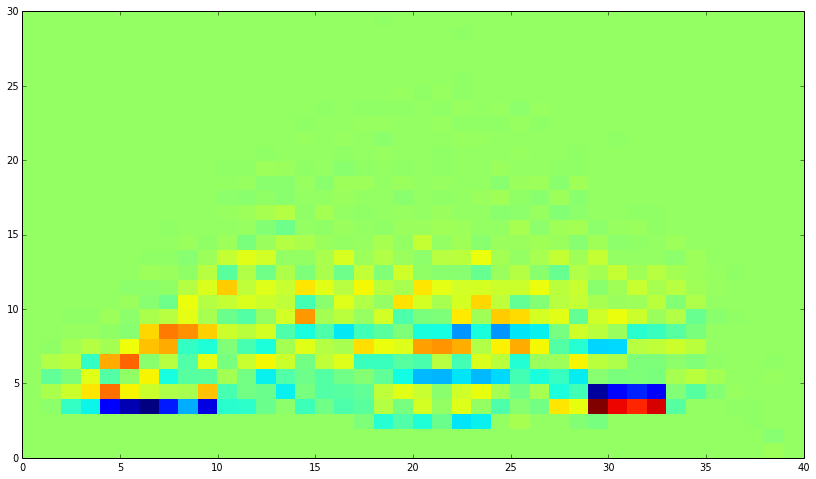

In [22]:
plt.pcolormesh(np.diff(Hc,axis=0).squeeze().sum(axis=-1)[::-1])

## data.diagnostics ##

    &diagnostics_list
    filename(1) = 'DiagLAYERS-transport',
    frequency(1) = 311040000.,
    fields(1:6,1)= 'LaUH1RHO','LaHw1RHO','LaPw1RHO',
                 'LaVH1RHO','LaHs1RHO','LaPs1RHO',
    filename(2) = 'DiagLAYERS-diapycnal',
    frequency(2) = 311040000.,
    fields(1:10,2)= 'LaTs1RHO','LaTh1RHO','LaTr1RHO',
                 'LTha1RHO','LTra1RHO',
                 'LaSs1RHO','LaSh1RHO','LaSr1RHO',
                 'LSha1RHO','LSra1RHO', 
    filename(3) = 'DiagLAYERS-trend',
    frequency(3) = -311040000.,
    timePhase(3) = 0.,
    fields(1,3) = 'LaHc1RHO',



In [98]:
# load data
from mitgcmdata import layers
m = MITgcmmodel.ModelInstance(ddir, default_iter=iter0+diters)


 90  40  15


/Users/rpa/RND/GCM/global_oce_latlon_layers/run/XC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/XG.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/YC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/YG.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/DYC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/DYG.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/DXC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/DXG.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/RAC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/RC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/RF.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/DRC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/DRF.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/Depth.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/hFacC.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/hFacS.meta
/Users/rpa/RND/GCM/global_oce_latlon_layers/run/hFacW.meta


In [99]:
meta

{'dataprec': ['float32'],
 'dimlist': [90, 40, 29],
 'fldlist': ['LaTs1RHO',
  'LaTh1RHO',
  'LaTr1RHO',
  'LTha1RHO',
  'LTra1RHO',
  'LaSs1RHO',
  'LaSh1RHO',
  'LaSr1RHO',
  'LSha1RHO',
  'LSra1RHO',
  'LTto1RHO',
  'LSto1RHO'],
 'missingvalue': [-999.0],
 'ndims': [3],
 'nflds': [12],
 'nrecords': [12],
 'simulation': ['global_oce_latlon'],
 'timeinterval': [[3110400000.0, 3421440000.0]],
 'timestepnumber': [39600]}

IndexError: index 10 is out of bounds for axis 0 with size 10

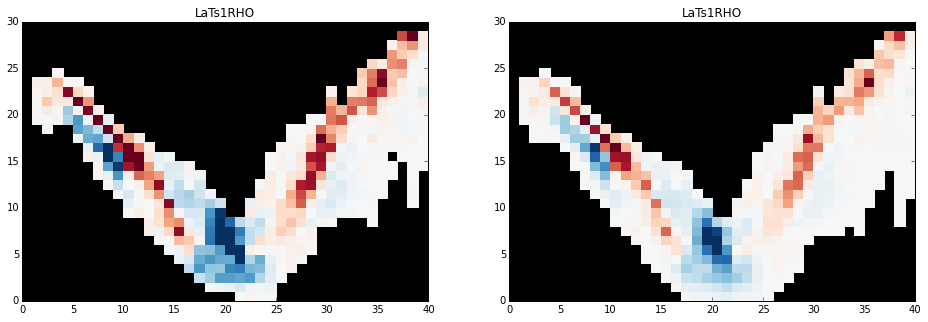

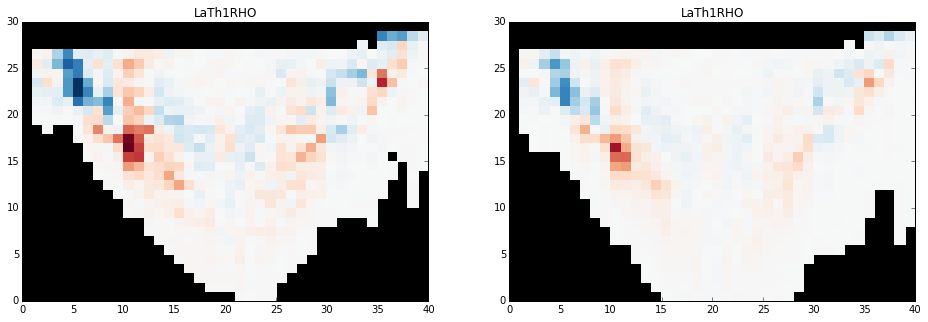

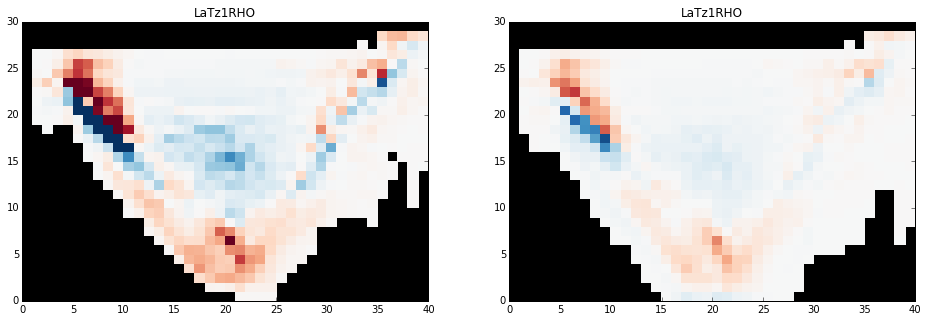

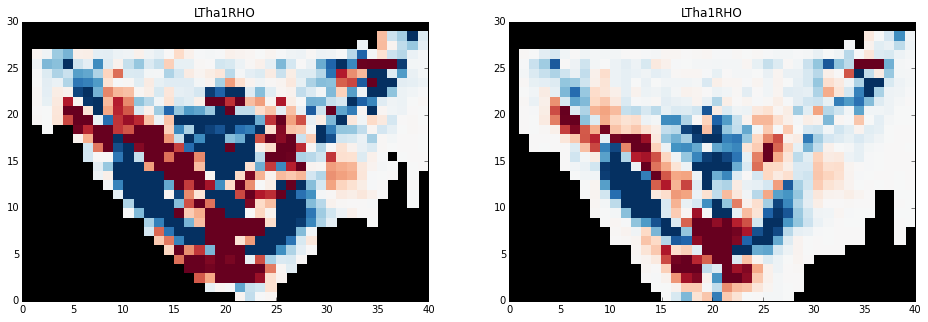

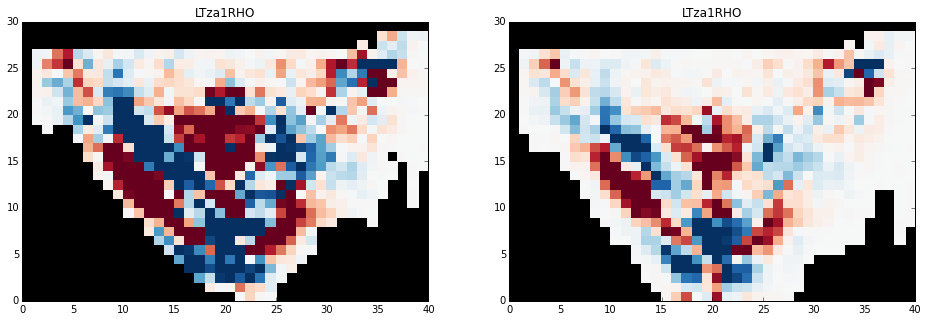

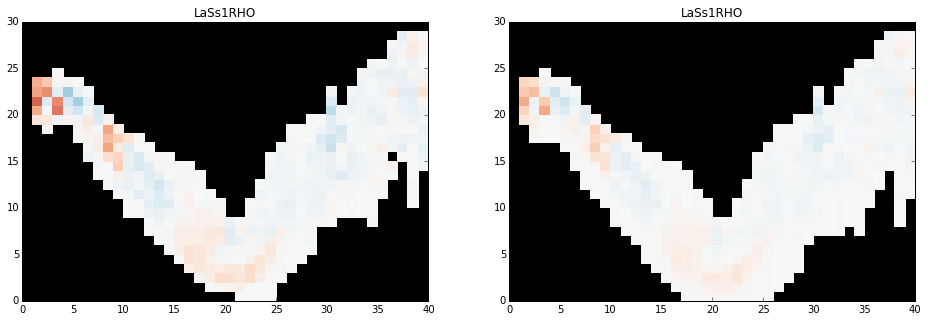

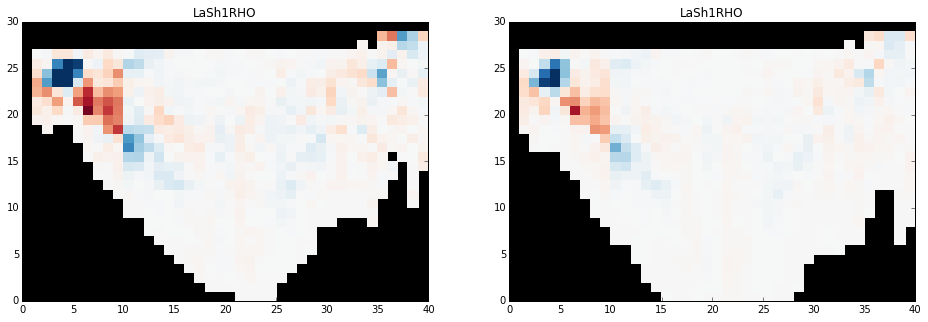

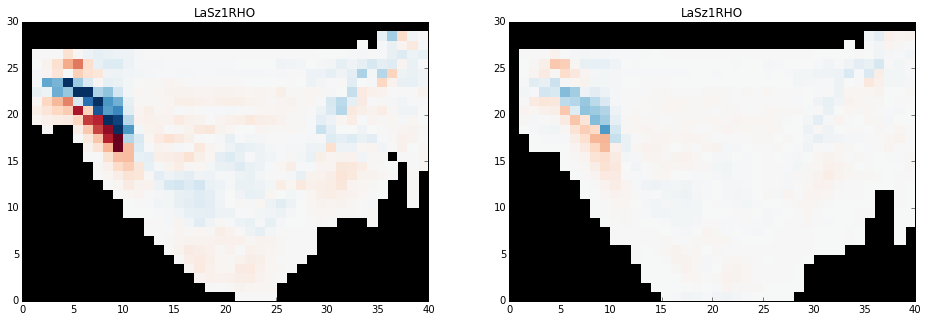

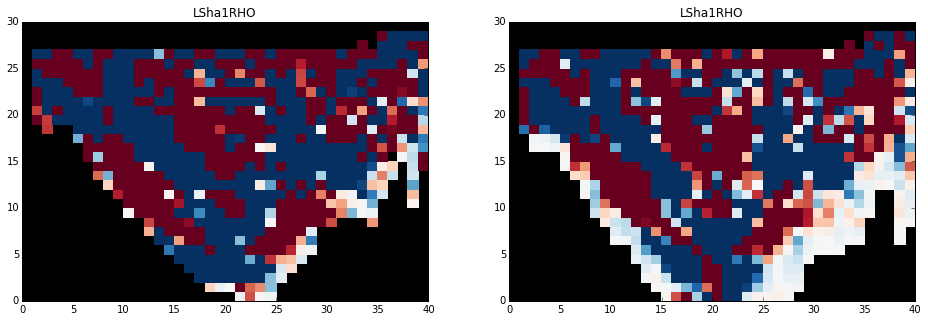

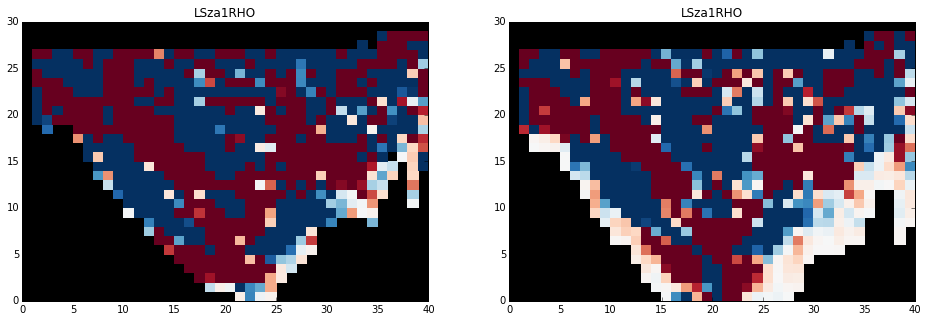

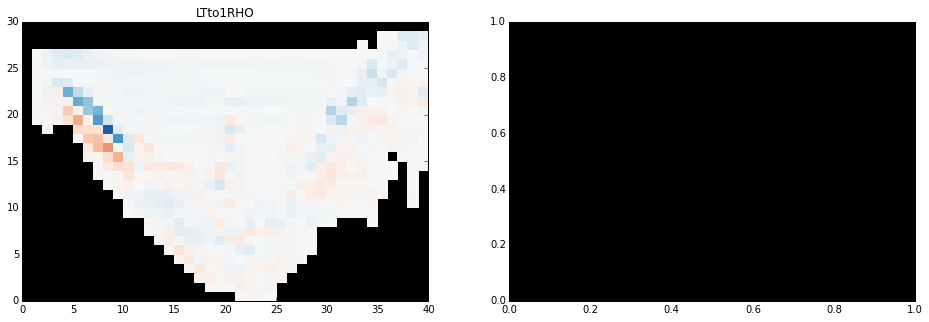

In [178]:
r = 0.6e-4

ldold, i, metaold = mds.rdmds(ddir+'/old_output/DiagLAYERS-diapycnal',iter0+diters,
                                      returnmeta=True)

ld, i, meta = mds.rdmds(ddir+'/DiagLAYERS-diapycnal',iter0+diters,
                                      returnmeta=True)


for n in range(ld.shape[0]):
    plt.figure(figsize=(16,5))

    tit = meta['fldlist'][n]
    if tit[2:4]=='to':
        r *= 24*60*60
    plt.subplot(121, axisbg='k')
    plt.pcolormesh(np.ma.masked_equal(ld[n].sum(axis=-1),0), cmap='RdBu_r')
    plt.clim([-r,r])
    plt.title(tit)

    plt.subplot(122, axisbg='k')
    plt.pcolormesh(np.ma.masked_equal(ldold[n].sum(axis=-1),0), cmap='RdBu_r')
    plt.clim([-r,r])
    plt.title(tit)

    #plt.colorbar()


In [70]:
k = 15

r = 1e-6
for n in range(ldold.shape[0]):
    plt.figure(figsize=(16,5))

    plt.subplot(121, axisbg='k')
    plt.pcolormesh(np.ma.masked_array(ld[n,k],m.mask[0]), cmap='RdBu_r')
    plt.clim([-r,r])
    plt.title(meta['fldlist'][n])

    plt.subplot(122, axisbg='k')
    plt.pcolormesh(np.ma.masked_array(ldold[n,k], m.mask[0]), cmap='RdBu_r')
    plt.clim([-r,r])
    plt.title(metaold['fldlist'][n])

    #plt.colorbar()


NameError: name 'ldold' is not defined

<matplotlib.contour.QuadContourSet instance at 0x116740b90>

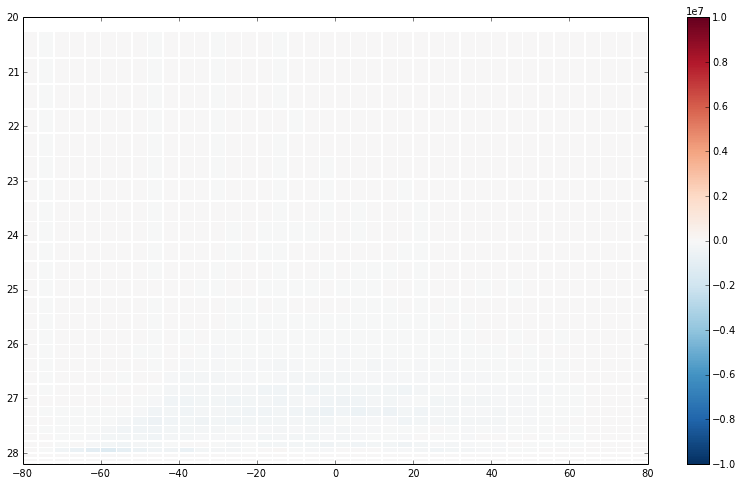

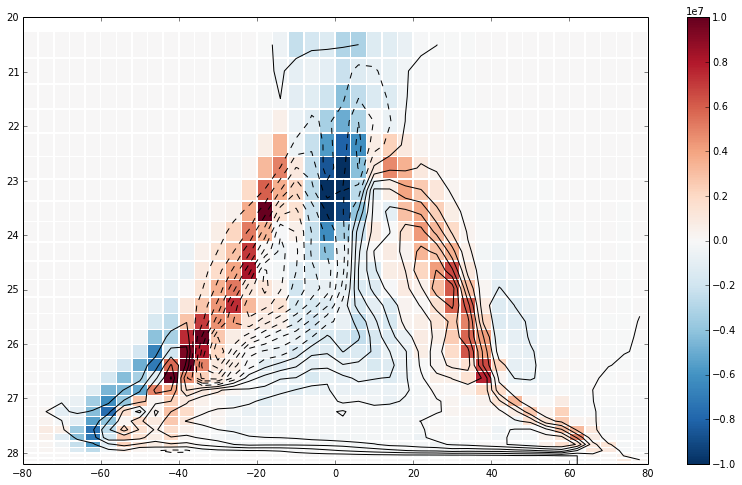

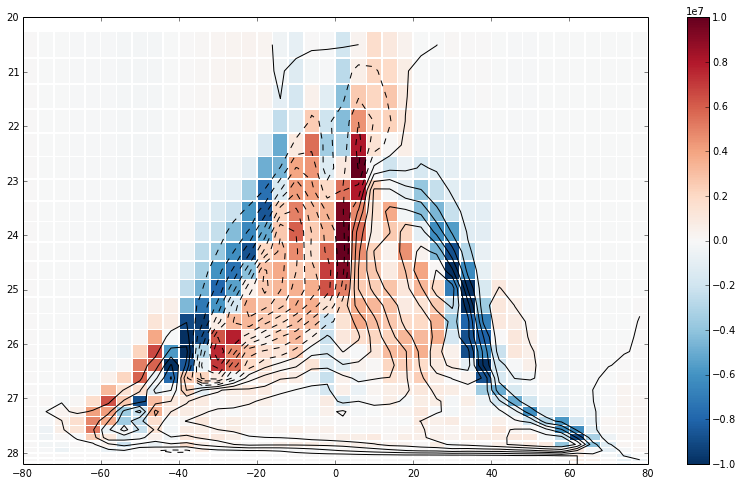

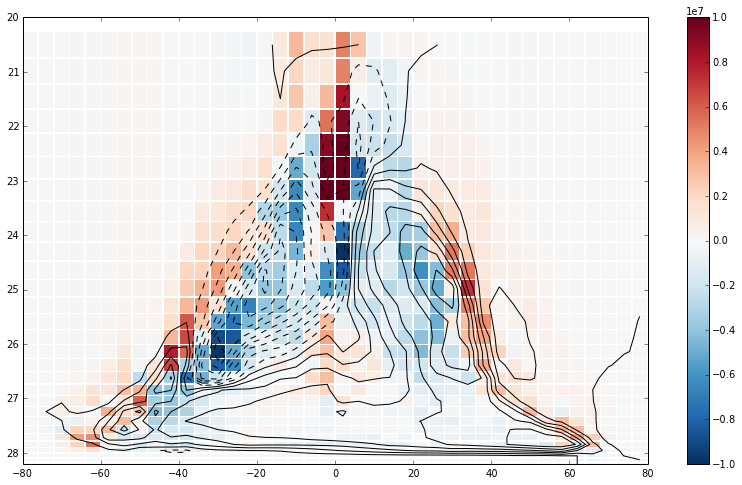

In [131]:
r = 10e6

Yg = np.hstack([m.yg[0,:,0], 2*m.yg[0,-1,0]-m.yg[0,-2,0]])
Xg = np.hstack([m.xg[0,0,:], 2*m.xg[0,0,-1]-m.xg[0,0,-2]])
Yc = m.yc[0,:,0]
Xc = m.xc[0,0,:]

lb = la.layers_bounds_w - 1000.
lbc = la.layers_top - 1000.

plt.figure()
plt.pcolormesh(Ypc, lb, dvol_dt.sum(axis=-1),
                cmap='RdBu_r', edgecolors='1.0', linewidths=0.2)
plt.clim([-r, r])
plt.ylim([28.2,20])
plt.colorbar()

plt.figure()
plt.pcolormesh(Ypc, lb, diapycnal_vel.sum(axis=0).sum(axis=-1),
               cmap='RdBu_r', edgecolors='1.0', linewidths=0.2)
plt.clim([-r, r])
plt.ylim([28.2,20])
plt.colorbar()
plt.contour(Yc, lbc, psi, 20, colors='k')

plt.figure()
plt.pcolormesh(Ypc, lb, advective_vel.sum(axis=-1),
               cmap='RdBu_r', edgecolors='1.0', linewidths=0.2)
plt.clim([-r, r])
plt.ylim([28.2,20])
plt.colorbar()
plt.contour(Yc, lbc, psi, 20, colors='k')

plt.figure()
plt.pcolormesh(Ypc, lb, diapycnal_vel_numerical.sum(axis=-1),
               cmap='RdBu_r', edgecolors='1.0', linewidths=0.2)
plt.clim([-r, r])
plt.ylim([28.2,20])
plt.colorbar()
plt.contour(Yc, lbc, psi, 20, colors='k')


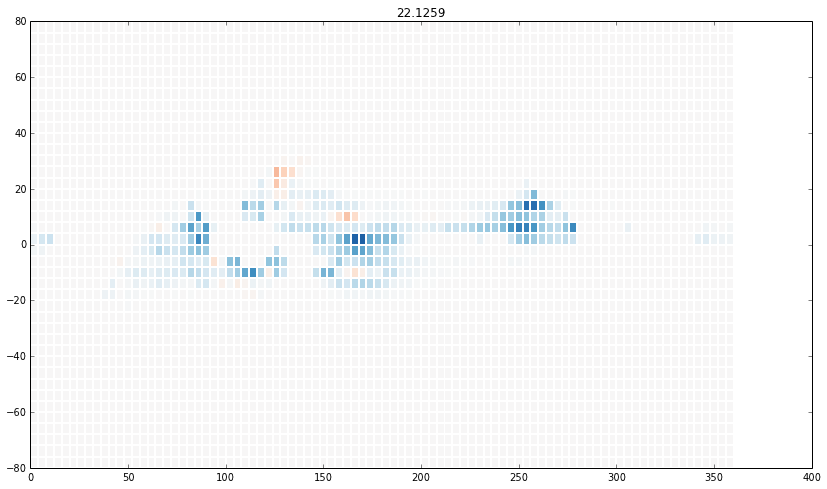

In [139]:
n = 25
plt.pcolormesh(Xpc, Ypc, diapycnal_vel[0,n],
               cmap='RdBu_r', edgecolor='1.0', linewidth=0.5)
plt.clim([-4*r/m.Nx, 4*r/m.Nx])
plt.title('%g' % lb[n])

<matplotlib.colorbar.Colorbar instance at 0x112788bd8>

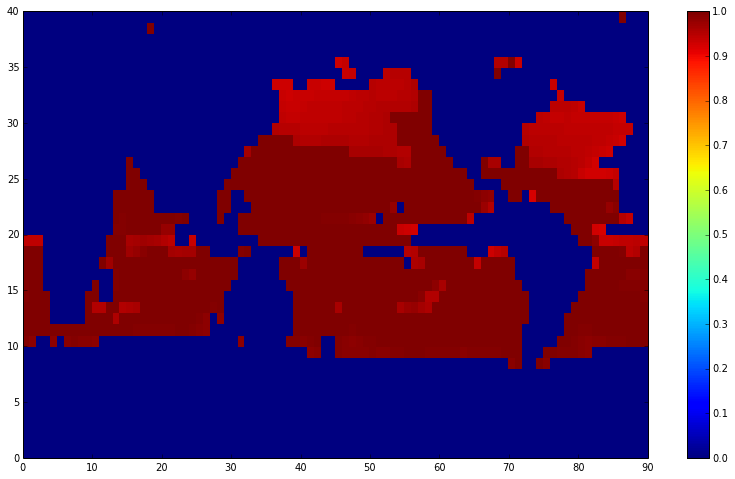

In [144]:
plt.pcolormesh(layers_transport[2,10])
plt.colorbar()

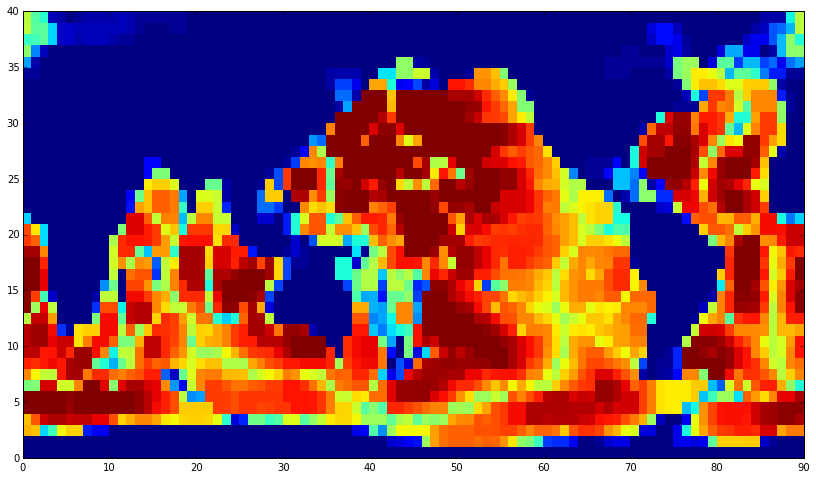

In [57]:
plt.pcolormesh(m.depth)

In [59]:
m.depth[4,38]

3099.5

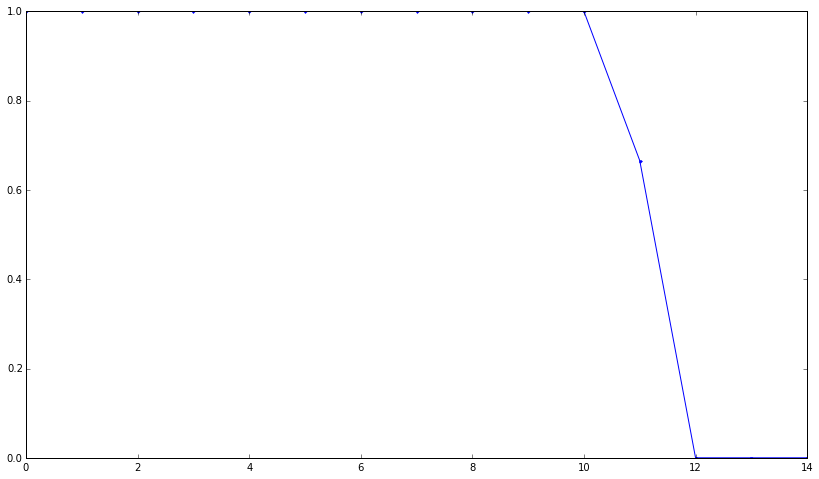

In [62]:
plt.plot(m.hFacC[:,4,38], '.-')

      filename(2) = 'DiagLAYERS-diapycnal',
      frequency(2) = 311040000.,
      fields(1:12,2)= 'LaTs1RHO','LaTh1RHO','LaTz1RHO',
                     'LTha1RHO','LTza1RHO',
                     'LaSs1RHO','LaSh1RHO','LaSz1RHO',
                     'LSha1RHO','LSza1RHO',
                     'LTto1RHO','LSto1RHO',


In [137]:
# transformation rates
la = layers.LayersAnalyzer(m)
dv = la.diapycnal_velocity(ld)
labels = ['LaTs1RHO','LaTh1RHO','LaTz1RHO',
                 'LTha1RHO','LTza1RHO',
                 'LaSs1RHO','LaSh1RHO','LaSz1RHO',
                 'LSha1RHO','LSza1RHO',
                 'LTto1RHO','LSto1RHO']

In [167]:
m.yc[0,12,0]
j = 10

In [168]:
# transformation rate
tr = dv[:,:,:j,:].sum(axis=-1).sum(axis=-1)

In [169]:
rho = la.layers_bounds[1:-1]

(24, 28.2)

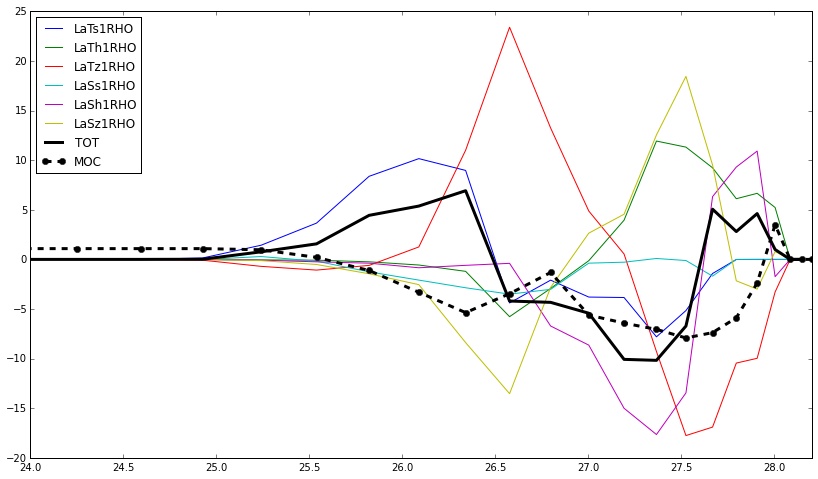

In [171]:
plt.plot(rho, -tr[:3].T/1e6)
plt.plot(rho, -tr[5:8].T/1e6)
plt.plot(rho, -(tr[:3].sum(axis=0) + tr[5:8].sum(axis=0))/1e6, color='k', linewidth=3)
plt.plot(la.layers_top, -d['psi'][:,j], 'ko--', linewidth=3)

plt.legend(labels[:3] + labels[5:8] + ['TOT', 'MOC'], loc='upper left')
plt.xlim([24,28.2])

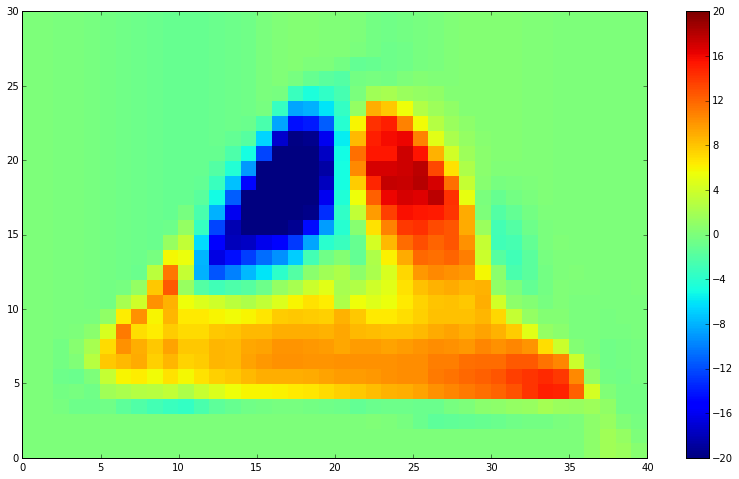

In [165]:
plt.pcolormesh(d['psi'])
plt.colorbar()
plt.clim([-20,20])